# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]


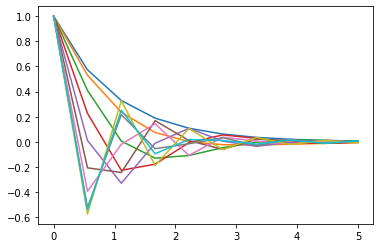

In [36]:
import matplotlib.pyplot as plt 
import numpy as np 
import math

x = np.linspace(0, 5, 10) 

theta = np.linspace(0, 2, 10)
print(theta)
#y = np.cos(np.pi * theta * x) *(np.exp(-x))
fig, ax = plt.subplots()

def f(x, theta):
    return np.cos(np.pi * theta * x) * np.exp(-x)

for i in theta: 
    ans = f(x, i)
    #print(f(x,i))
    #print(x)
    ax.plot(x, ans)


plt.show()

# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

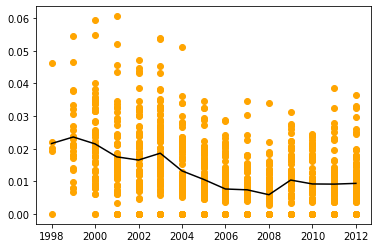

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#read the csv 
df = pd.read_csv('data/tennis.csv')

#fill the NaN value with 0
df["player1 total points total"] = df['player1 total points total'].replace('nan', np.nan).fillna(0)
df["player1 double faults"] = df["player1 double faults"].replace('nan', np.nan).fillna(0)

#calculate the ratio
df['ratio'] = (df['player1 double faults'] / df['player1 total points total'])

#get the trend
year_trend = df.groupby(['year']).mean().reset_index()
#print(year_trend)

#Graph stuff

fig, ax = plt.subplots()
y = df.ratio
x = df.year
ax.scatter(x, y, color='orange')
ax.plot(year_trend.year, year_trend.ratio, color='black')

#shot the plot
plt.show()

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


In [25]:
import datetime as dt
from pandas_datareader import data

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

print(ticker)

                 INTC        MSFT         IBM        BHP          TM  \
Date                                                                   
2019-01-02  47.080002  101.120003  115.209999  47.860001  116.279999   
2019-01-03  44.490002   97.400002  112.910004  46.389999  114.650002   
2019-01-04  47.220001  101.930000  117.320000  49.220001  119.730003   
2019-01-07  47.439999  102.059998  118.150002  49.480000  121.279999   
2019-01-08  47.740002  102.800003  119.830002  49.330002  122.309998   
...               ...         ...         ...        ...         ...   
2019-12-24  59.410000  157.380005  134.979996  54.459999  141.339996   
2019-12-26  59.820000  158.669998  134.910004  54.810001  141.529999   
2019-12-27  60.080002  158.960007  135.270004  54.930000  141.279999   
2019-12-30  59.619999  157.589996  132.809998  54.720001  140.610001   
2019-12-31  59.849998  157.699997  134.039993  54.709999  140.539993   

                 AAPL         AMZN          BA       QCOM      

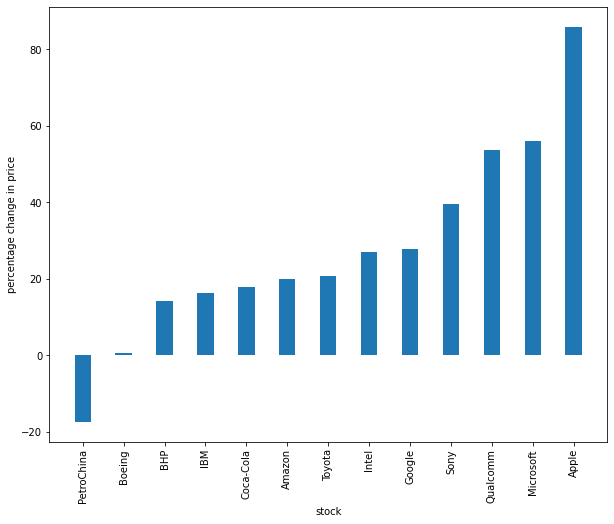

In [47]:
#calculate the percentage change for each ticker
percentage_change = ((ticker.iloc[-1] - ticker.iloc[0]) / ticker.iloc[0] * 100).sort_values()
percentage_change

#plotting time 

fig, ax = plt.subplots(figsize=(10,8))
ax.bar([ticker_list[x] for x in percentage_change.index], percentage_change, width=0.4)
ax.set_xlabel('stock')
ax.set_ylabel('percentage change in price')
plt.xticks(rotation=90)
plt.show()

# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

In [ ]:
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.